# Tensorflow Brain MRI Tumor Segmentation

   _
   

Bennett Wineholt bmw39@cornell.edu

Cornell/WCM Scientific Computing Training Series (SCTS) described at https://its.weill.cornell.edu/scientific-computing-training-series

 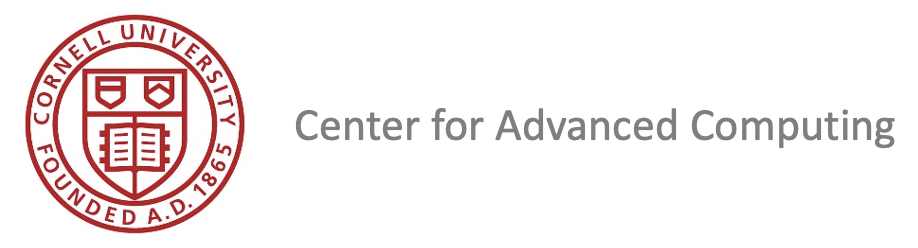

# Outline

Problem Statment
- Brain MRI Tumor Segmentation using Tensorflow

About the Technologies Used
- Tensorflow
- Keras
- Google Colab
- Kaggle

Acknowledgements

Notebook Code
- data loading
- U-Net model architecture defintion
- dataset split and train
- evaluation

Further References

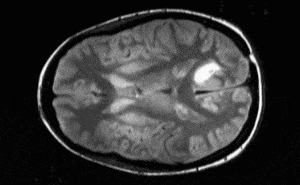


# Problem Statement

Given MRI images of healthy and cancerous brain tissue, train a segmentation model to highlight cancerous regions.

The objective for this notebook is to explore the U-Net model architecture, a popular segmentation model architecture introduced in the paper titled "[U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/abs/1505.04597)" in May of 2015. The exploration of this model architecture will be conducted via brain tumor segmentation.

# Dataset

The dataset used in this notebook is the 'Brain MRI segmentation', created by [@mateuszbuda](https://www.kaggle.com/mateuszbuda). This dataset contains brain Magnetic Resonance Images (MRIs) together with manual FLAIR abnormality segmentation masks. The images were obtained from The Cancer Imaging Archive (TCIA).

They correspond to 110 patients included in [The Cancer Genome Atlas (TCGA) lower-grade glioma collection](https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=5309188) with at least fluid-attenuated inversion recovery (FLAIR) sequence and genomic cluster data available.

Access the Kaggle Version of the dataset here: [Kaggle | Brain MRI segmentation Dataset](https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation)

# What are Brain Tumors

A brain tumor is a cancerous or non-cancerous mass or growth of abnormal cells in the brain. Nearby locations include nerves, the pituitary gland, the pineal gland, and the membranes that cover the surface of the brain. Brain tumors that begin in the brain are called primary brain tumors. Sometimes, cancer spreads to the brain from other parts of the body. These tumors are known as secondary brain tumors, also called metastatic brain tumors.

# About Tensorflow

[Tensorflow](tensorflow.org) is an open source library for machine learning and artificial intelligence developed at Google.  It can be used for a wide range of numerical computing tasks with special focus on training and inference of large neural networks.


# About Keras

[Keras](https://keras.io/examples/) is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library. Up until version 2.3, Keras supported multiple backends, including TensorFlow, Microsoft Cognitive Toolkit (CNTK), and Theano. However, starting from version 2.4.0, Keras is now fully integrated into TensorFlow, operating as a high-level API. It is designed to enable fast experimentation with deep neural networks, it is user-friendly, modular, and extensible.

# About Google Colab

[Google Colaboratory](https://colab.research.google.com/), commonly known as Google Colab, is a free cloud service hosted by Google to encourage machine learning and artificial intelligence research, which allows users to write and execute arbitrary python code through the browser. Colab is a Jupyter notebook environment that requires no setup to use and provides access to computing resources including GPUs and TPUs, making it even more appealing for machine learning projects. It facilitates collaboration among researchers, simplifies sharing of projects, and even integrates seamlessly with Google Drive.

# About Kaggle

[Kaggle](https://www.kaggle.com/) is an online community of data scientists and machine learning practitioners that allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges. Founded in 2010 and acquired by Google in 2017, Kaggle is one of the most prominent and active platforms for competitive data science. It offers both a public data platform where users can search and download a wide variety of datasets, and a cloud-based workbench for data science, which provides a collaborative environment to work on projects.

# Acknowledgements

Cornell/WCM Scientific Computing Training Series (SCTS) described at https://its.weill.cornell.edu/scientific-computing-training-series

Dataset
https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation

Notebook Code
https://www.kaggle.com/code/abdallahwagih/brain-tumor-segmentation-unet-dice-coef-89-6

Background and Explanation
https://www.kaggle.com/code/matthewjansen/vision-brain-tumor-semantic-segmentation/notebook

Debugging of this notebook was perfomed using ChatGPT4 https://chat.openai.com/



 _

# Retrieve MRI image dataset from kaggle

Kaggle Registration Guide

https://christianjmills.com/posts/kaggle-obtain-api-key-tutorial/

https://www.kaggle.com/docs/api



See below for a file upload alternative


In [ ]:
# Install Kaggle library
!pip install kaggle

# Upload kaggle API key file
from google.colab import files
files.upload()  # Upload kaggle.json here

# Set up Kaggle directory and move kaggle.json into it
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Download the dataset and unzip it
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation
!unzip -q lgg-mri-segmentation.zip -d dataset
!ls dataset/
!ls dataset/kaggle_3m/

 99% 710M/714M [00:21<00:00, 44.6MB/s]
100% 714M/714M [00:21<00:00, 34.5MB/s]
kaggle_3m  lgg-mri-segmentation
data.csv	       TCGA_DU_6400_19830518  TCGA_DU_A5TP_19970614  TCGA_HT_7680_19970202
README.md	       TCGA_DU_6401_19831001  TCGA_DU_A5TR_19970726  TCGA_HT_7684_19950816
TCGA_CS_4941_19960909  TCGA_DU_6404_19850629  TCGA_DU_A5TS_19970726  TCGA_HT_7686_19950629
TCGA_CS_4942_19970222  TCGA_DU_6405_19851005  TCGA_DU_A5TT_19980318  TCGA_HT_7690_19960312
TCGA_CS_4943_20000902  TCGA_DU_6407_19860514  TCGA_DU_A5TU_19980312  TCGA_HT_7692_19960724
TCGA_CS_4944_20010208  TCGA_DU_6408_19860521  TCGA_DU_A5TW_19980228  TCGA_HT_7693_19950520
TCGA_CS_5393_19990606  TCGA_DU_7008_19830723  TCGA_DU_A5TY_19970709  TCGA_HT_7694_19950404
TCGA_CS_5395_19981004  TCGA_DU_7010_19860307  TCGA_EZ_7264_20010816  TCGA_HT_7855_19951020
TCGA_CS_5396_20010302  TCGA_DU_7013_19860523  TCGA_FG_5962_20000626  TCGA_HT_7856_19950831
TCGA_CS_5397_20010315  TCGA_DU_7014_19860618  TCGA_FG_5964_20010511  TCGA_HT_7860_19

In [ ]:
# Alternative upload dataset file
#files.upload() # upload lgg-mri-segmentation.zip here
#!unzip -q lgg-mri-segmentation.zip -d dataset
#!ls dataset/
#!ls dataset/kaggle_3m/

# download dataset locally for later use
#files.download('lgg-mri-segmentation.zip')

In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split

In [ ]:
# function to create dataframe
def create_df(data_dir):
    images_paths = []
    masks_paths = glob.glob(f'{data_dir}/*/*_mask*')
    for i in masks_paths:
        images_paths.append(i.replace('_mask', ''))
    df = pd.DataFrame(data= {'images_paths': images_paths, 'masks_paths': masks_paths})
    return df

# Function to split dataframe into train, validation, test
def split_df(df):
    train_df, dummy_df = train_test_split(df, train_size= 0.8)
    valid_df, test_df = train_test_split(dummy_df, train_size= 0.5)
    return train_df, valid_df, test_df

In [ ]:
# Function to create image generators and augmentation
def create_gens(df, aug_dict):
    img_size = (256, 256)
    batch_size = 40
    img_gen = ImageDataGenerator(**aug_dict)
    msk_gen = ImageDataGenerator(**aug_dict)
    # Create image generator
    image_gen = img_gen.flow_from_dataframe(df, x_col='images_paths', class_mode=None, color_mode='rgb', target_size=img_size,
                                            batch_size=batch_size, save_to_dir=None, save_prefix='image', seed=1)
    mask_gen = msk_gen.flow_from_dataframe(df, x_col='masks_paths', class_mode=None, color_mode='grayscale', target_size=img_size,
                                            batch_size=batch_size, save_to_dir=None, save_prefix= 'mask', seed=1)
    gen = zip(image_gen, mask_gen)
    for (img, msk) in gen:
        img = img / 255
        msk = msk / 255
        msk[msk > 0.5] = 1
        msk[msk <= 0.5] = 0
        yield (img, msk)

In [ ]:
# Unet model structure
def unet(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # First DownConvolution / Encoder Leg will begin, so start with Conv2D
    conv1 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(inputs)
    bn1 = Activation("relu")(conv1)
    conv1 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(bn1)
    bn1 = BatchNormalization(axis=3)(conv1)
    bn1 = Activation("relu")(bn1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(bn1)

    conv2 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(pool1)
    bn2 = Activation("relu")(conv2)
    conv2 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(bn2)
    bn2 = BatchNormalization(axis=3)(conv2)
    bn2 = Activation("relu")(bn2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(bn2)

    conv3 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(pool2)
    bn3 = Activation("relu")(conv3)
    conv3 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(bn3)
    bn3 = BatchNormalization(axis=3)(conv3)
    bn3 = Activation("relu")(bn3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(bn3)

    conv4 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(pool3)
    bn4 = Activation("relu")(conv4)
    conv4 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(bn4)
    bn4 = BatchNormalization(axis=3)(conv4)
    bn4 = Activation("relu")(bn4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(bn4)

    conv5 = Conv2D(filters=1024, kernel_size=(3, 3), padding="same")(pool4)
    bn5 = Activation("relu")(conv5)
    conv5 = Conv2D(filters=1024, kernel_size=(3, 3), padding="same")(bn5)
    bn5 = BatchNormalization(axis=3)(conv5)
    bn5 = Activation("relu")(bn5)

    """ Now UpConvolution / Decoder Leg will begin, so start with Conv2DTranspose
    The gray arrows (in the above image) indicate the skip connections that concatenate the encoder feature map with the decoder, which helps the backward flow of gradients for improved training. """
    """ After every concatenation we again apply two consecutive regular convolutions so that the model can learn to assemble a more precise output """

    up6 = concatenate([Conv2DTranspose(512, kernel_size=(2, 2), strides=(2, 2), padding="same")(bn5), conv4], axis=3)
    conv6 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(up6)
    bn6 = Activation("relu")(conv6)
    conv6 = Conv2D(filters=512, kernel_size=(3, 3), padding="same")(bn6)
    bn6 = BatchNormalization(axis=3)(conv6)
    bn6 = Activation("relu")(bn6)

    up7 = concatenate([Conv2DTranspose(256, kernel_size=(2, 2), strides=(2, 2), padding="same")(bn6), conv3], axis=3)
    conv7 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(up7)
    bn7 = Activation("relu")(conv7)
    conv7 = Conv2D(filters=256, kernel_size=(3, 3), padding="same")(bn7)
    bn7 = BatchNormalization(axis=3)(conv7)
    bn7 = Activation("relu")(bn7)

    up8 = concatenate([Conv2DTranspose(128, kernel_size=(2, 2), strides=(2, 2), padding="same")(bn7), conv2], axis=3)
    conv8 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(up8)
    bn8 = Activation("relu")(conv8)
    conv8 = Conv2D(filters=128, kernel_size=(3, 3), padding="same")(bn8)
    bn8 = BatchNormalization(axis=3)(conv8)
    bn8 = Activation("relu")(bn8)

    up9 = concatenate([Conv2DTranspose(64, kernel_size=(2, 2), strides=(2, 2), padding="same")(bn8), conv1], axis=3)
    conv9 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(up9)
    bn9 = Activation("relu")(conv9)
    conv9 = Conv2D(filters=64, kernel_size=(3, 3), padding="same")(bn9)
    bn9 = BatchNormalization(axis=3)(conv9)
    bn9 = Activation("relu")(bn9)

    conv10 = Conv2D(filters=1, kernel_size=(1, 1), activation="sigmoid")(bn9)

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:
# Functions for coefficients and loss
# function to create dice coefficient
def dice_coef(y_true, y_pred, smooth=100):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)

    intersection = K.sum(y_true_flatten * y_pred_flatten)
    union = K.sum(y_true_flatten) + K.sum(y_pred_flatten)
    return (2 * intersection + smooth) / (union + smooth)

# function to create dice loss
def dice_loss(y_true, y_pred, smooth=100):
    return -dice_coef(y_true, y_pred, smooth)

# function to create iou coefficient
def iou_coef(y_true, y_pred, smooth=100):
    intersection = K.sum(y_true * y_pred)
    sum = K.sum(y_true + y_pred)
    iou = (intersection + smooth) / (sum - intersection + smooth)
    return iou

In [ ]:
# Function to show images sample
def show_images(images, masks):
    plt.figure(figsize=(12, 12))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        img_path = images[i]
        mask_path = masks[i]
        # read image and convert it to RGB scale
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # read mask
        mask = cv2.imread(mask_path)
        # sho image and mask
        plt.imshow(image)
        plt.imshow(mask, alpha=0.4)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
# Function to display training history
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_iou = hist.history['iou_coef']
    tr_dice = hist.history['dice_coef']
    tr_loss = hist.history['loss']

    val_acc = hist.history['val_accuracy']
    val_iou = hist.history['val_iou_coef']
    val_dice = hist.history['val_dice_coef']
    val_loss = hist.history['val_loss']

    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    index_iou = np.argmax(iou_coef)
    iou_highest = val_iou[index_iou]
    index_dice = np.argmax(dice_coef)
    dice_highest = val_dice[index_dice]
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]

    Epochs = [i+1 for i in range(len(tr_acc))]

    acc_label = f'best epoch= {str(index_acc + 1)}'
    iou_label = f'best epoch= {str(index_iou + 1)}'
    dice_label = f'best epoch= {str(index_dice + 1)}'
    loss_label = f'best epoch= {str(index_loss + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 20))
    plt.style.use('fivethirtyeight')

    # Training Accuracy
    plt.subplot(2, 2, 1)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training IoU
    plt.subplot(2, 2, 2)
    plt.plot(Epochs, tr_iou, 'r', label= 'Training IoU')
    plt.plot(Epochs, val_iou, 'g', label= 'Validation IoU')

    plt.scatter(index_iou + 1 , iou_highest, s= 150, c= 'blue', label= iou_label)
    plt.title('Training and Validation IoU Coefficient')
    plt.xlabel('Epochs')
    plt.ylabel('IoU')
    plt.legend()

    # Training Dice
    plt.subplot(2, 2, 3)
    plt.plot(Epochs, tr_dice, 'r', label= 'Training Dice')
    plt.plot(Epochs, val_dice, 'g', label= 'Validation Dice')
    plt.scatter(index_dice + 1 , dice_highest, s= 150, c= 'blue', label= dice_label)
    plt.title('Training and Validation Dice Coefficient')
    plt.xlabel('Epochs')
    plt.ylabel('Dice')
    plt.legend()

    # Training Loss
    plt.subplot(2, 2, 4)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout
    plt.show()


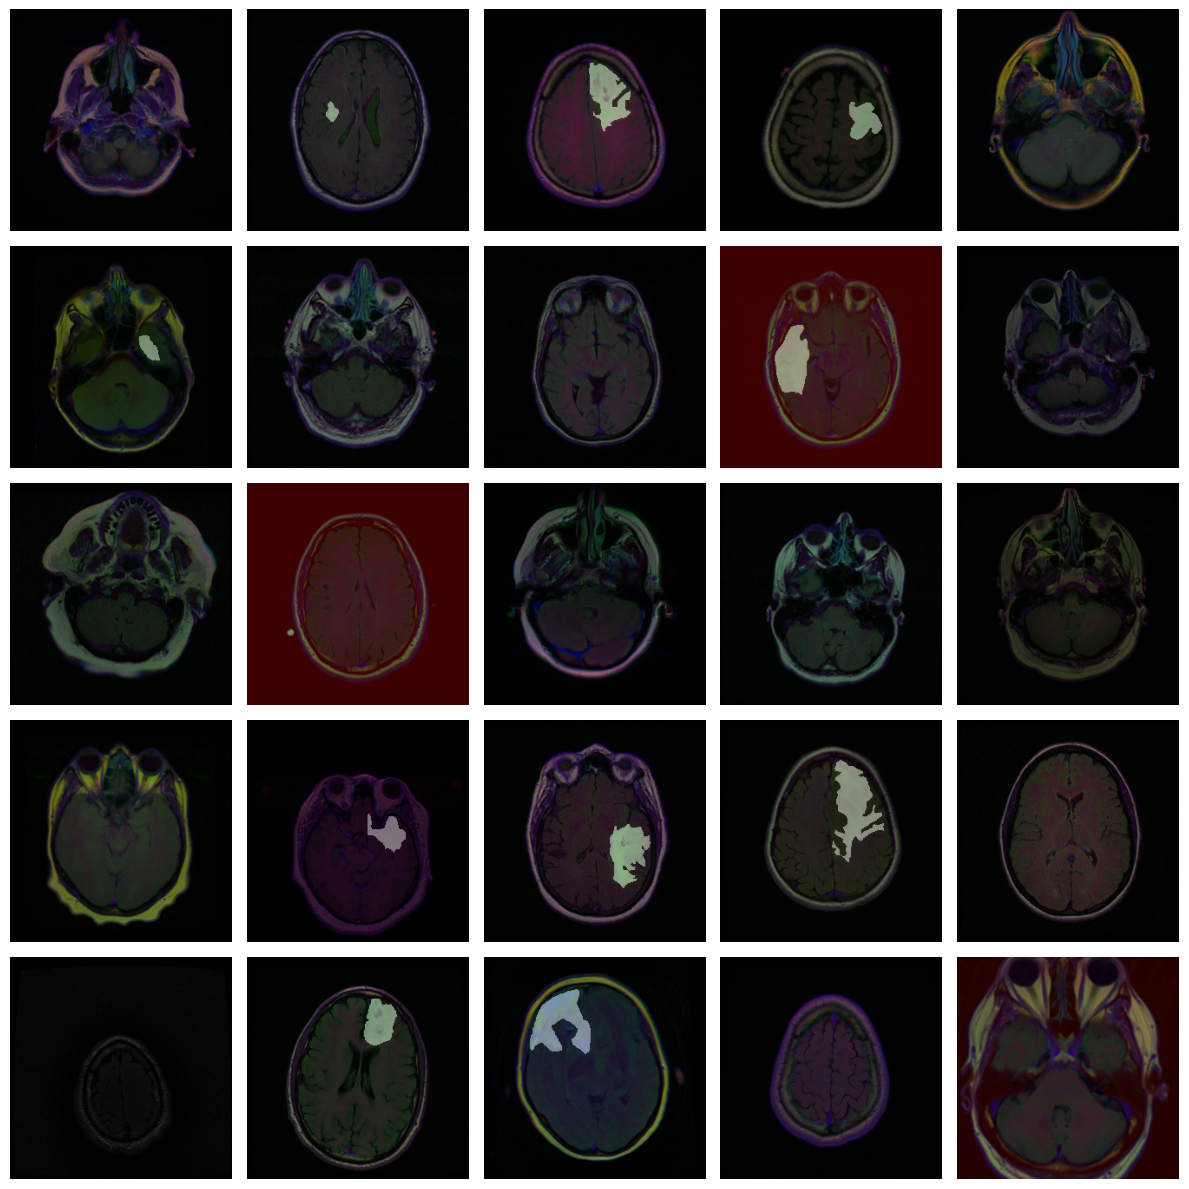

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 256, 256, 64)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['activation[0][0]']          
                                                                                              

In [ ]:
# Start reading data
#   /kaggle/input/lgg-mri-segmentation/kaggle_3m
data_dir = 'dataset/kaggle_3m'
df = create_df(data_dir)
train_df, valid_df, test_df = split_df(df)

tr_aug_dict = dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_gen = create_gens(train_df, aug_dict=tr_aug_dict)
valid_gen = create_gens(valid_df, aug_dict={})
test_gen = create_gens(test_df, aug_dict={})
show_images(list(train_df['images_paths']), list(train_df['masks_paths']))



In [ ]:
# Use Unet Model
with tf.device('/GPU:0'):
    model = unet()
    model.compile(Adamax(learning_rate= 0.001), loss= dice_loss, metrics= ['accuracy', iou_coef, dice_coef])
    model.summary()

In [ ]:
# Model Device placement debugging
# Check TensorFlow version (just for reference)
print("TensorFlow version:", tf.__version__)

# List available GPUs in this Colab session
print("Available GPU devices:", tf.config.list_physical_devices('GPU'))

# Check if a GPU is being used by TensorFlow
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

TensorFlow version: 2.15.0
Available GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Default GPU Device: /device:GPU:0


Found 3143 validated image filenames.
Found 3143 validated image filenames.
Epoch 1/120
79/78 [==============================] - ETA: 0s - loss: -0.0980 - accuracy: 0.9154 - iou_coef: 0.0522 - dice_coef: 0.0981Found 393 validated image filenames.
Found 393 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


78/78 [==============================] - 152s 1s/step - loss: -0.0980 - accuracy: 0.9154 - iou_coef: 0.0522 - dice_coef: 0.0981 - val_loss: -0.0344 - val_accuracy: 0.5643 - val_iou_coef: 0.0177 - val_dice_coef: 0.0346
Epoch 2/120
78/78 [==============================] - 109s 1s/step - loss: -0.2209 - accuracy: 0.9868 - iou_coef: 0.1263 - dice_coef: 0.2212 - val_loss: -0.0470 - val_accuracy: 0.9914 - val_iou_coef: 0.0251 - val_dice_coef: 0.0476
Epoch 3/120
78/78 [==============================] - 101s 1s/step - loss: -0.4213 - accuracy: 0.9919 - iou_coef: 0.2739 - dice_coef: 0.4221 - val_loss: -0.0362 - val_accuracy: 0.5212 - val_iou_coef: 0.0185 - val_dice_coef: 0.0363
Epoch 4/120
78/78 [==============================] - 105s 1s/step - loss: -0.5969 - accuracy: 0.9937 - iou_coef: 0.4349 - dice_coef: 0.5976 - val_loss: -0.4105 - val_accuracy: 0.9921 - val_iou_coef: 0.2664 - val_dice_coef: 0.4134
Epoch 5/120
78/78 [==============================] - 105s 1s/step - loss: -0.0591 - accuracy

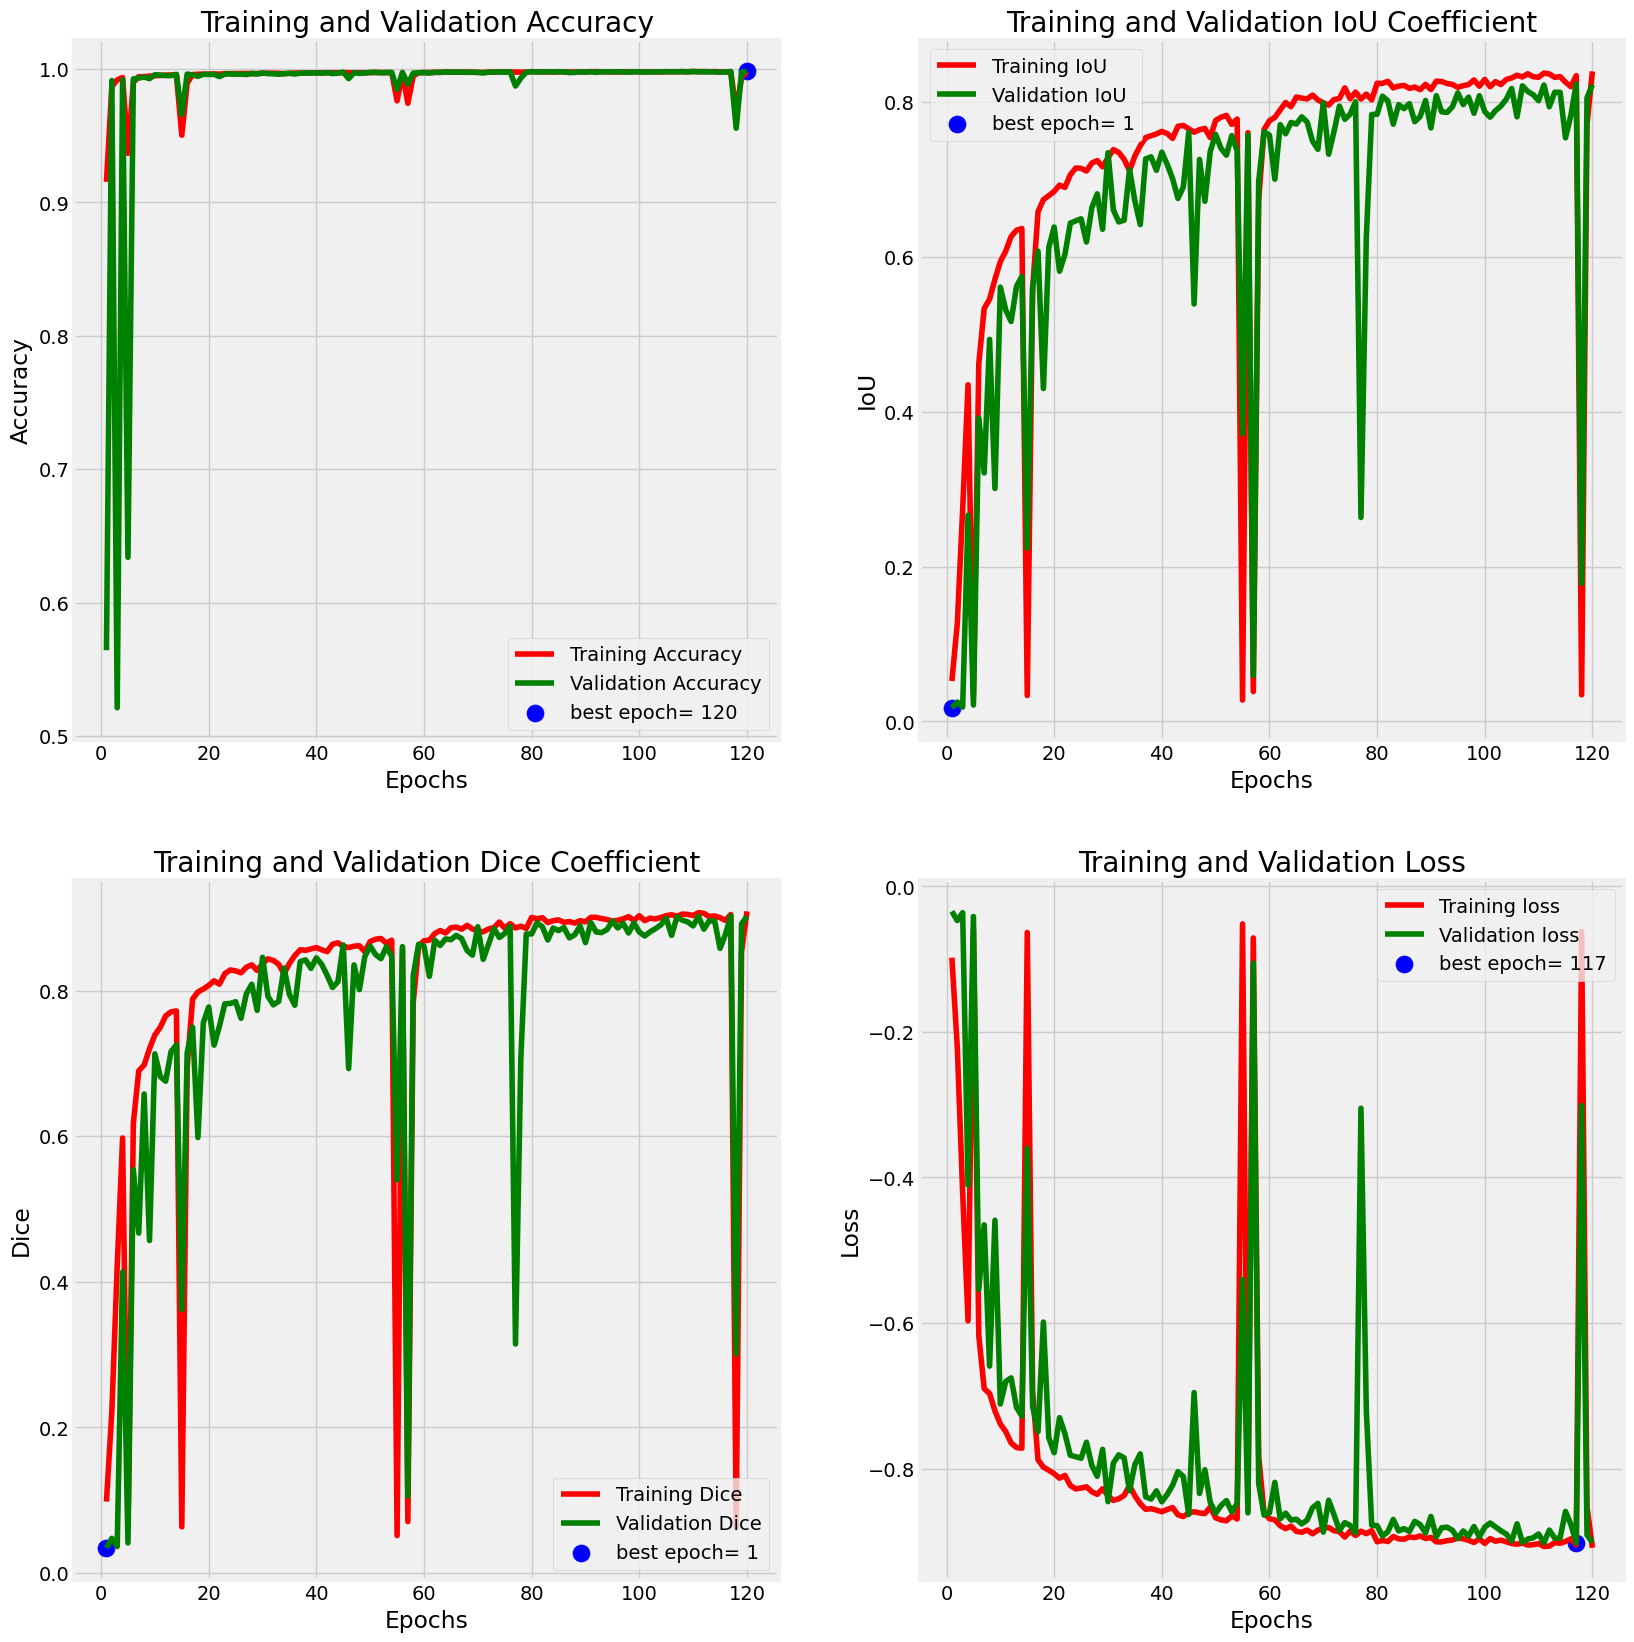

In [ ]:
# UNet Model training
epochs = 20      # 120 or longer for better accuracy
batch_size = 40  # can decrease to save gpu memory usage
# Nvidia V100 x 1 Colab Pro+
callbacks = [ModelCheckpoint('unet.hdf5', verbose=0, save_best_only=True)]
history = model.fit(train_gen,
                    steps_per_epoch=len(train_df) / batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=callbacks,
                    validation_data = valid_gen,
                    validation_steps=len(valid_df) / batch_size)
plot_training(history)

In [ ]:
# double sure
model.save('unet.keras')
!zip -r '/content/unet.keras.zip' '/content/unet.keras'
files.download('/content/unet.keras.zip')

  adding: content/unet.keras (deflated 11%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Model Evaluation
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)


print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print("Train IoU: ", train_score[2])
print("Train Dice: ", train_score[3])
print('-' * 20)

print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print("Valid IoU: ", valid_score[2])
print("Valid Dice: ", valid_score[3])
print('-' * 20)

print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])
print("Test IoU: ", test_score[2])
print("Test Dice: ", test_score[3])


131/131 [==============================] - 25s 192ms/step - loss: -0.8991 - accuracy: 0.9981 - iou_coef: 0.8176 - dice_coef: 0.8990
Found 393 validated image filenames.
Found 393 validated image filenames.
131/131 [==============================] - 27s 203ms/step - loss: -0.9045 - accuracy: 0.9983 - iou_coef: 0.8271 - dice_coef: 0.9043
Train Loss:  -0.9244384169578552
Train Accuracy:  0.9984609484672546
Train IoU:  0.8601341247558594
Train Dice:  0.9244445562362671
--------------------
Valid Loss:  -0.8990655541419983
Valid Accuracy:  0.9981231093406677
Valid IoU:  0.8176297545433044
Valid Dice:  0.8989903330802917
--------------------
Test Loss:  -0.9044743180274963
Test Accuracy:  0.9982519149780273
Test IoU:  0.827080249786377
Test Dice:  0.9042673110961914


1/1 [==============================] - 2s 2s/step


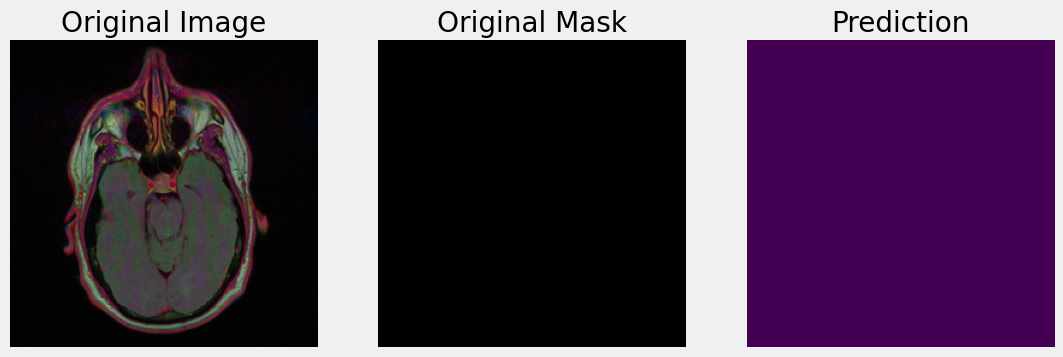

1/1 [==============================] - 0s 20ms/step


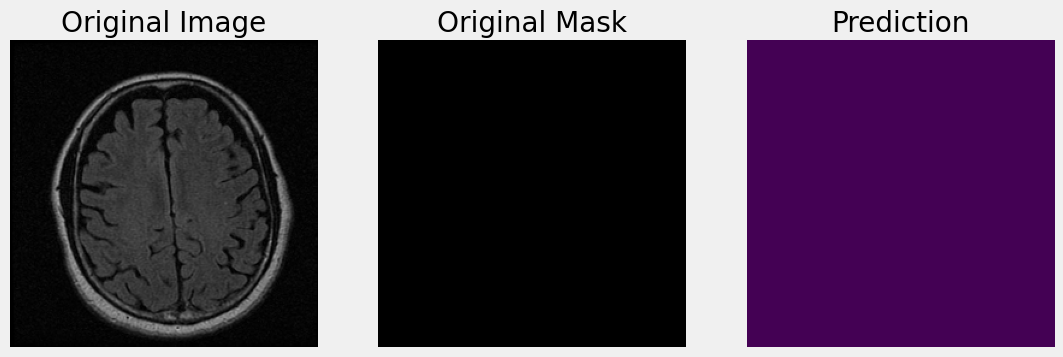

1/1 [==============================] - 0s 37ms/step


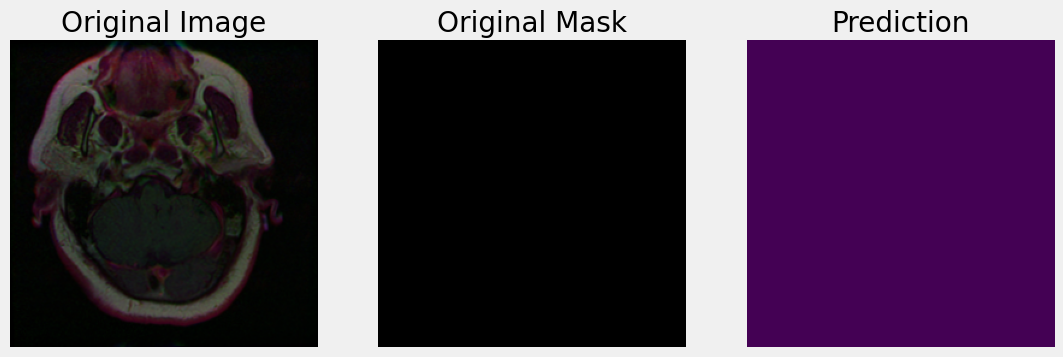

1/1 [==============================] - 0s 30ms/step


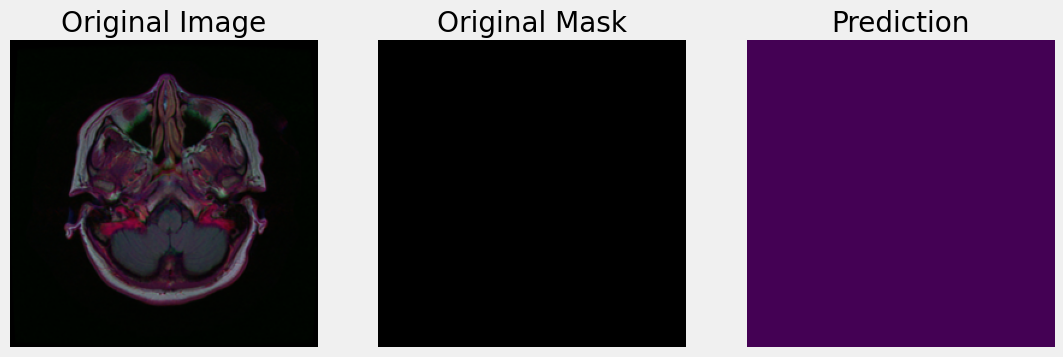

1/1 [==============================] - 0s 31ms/step


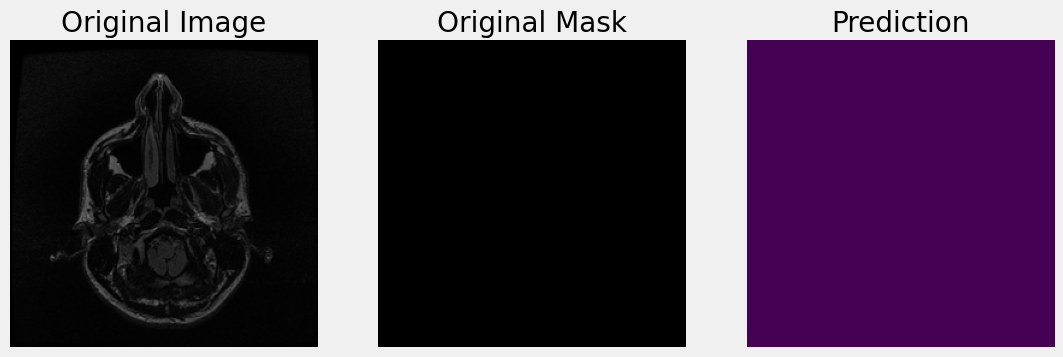

1/1 [==============================] - 0s 27ms/step


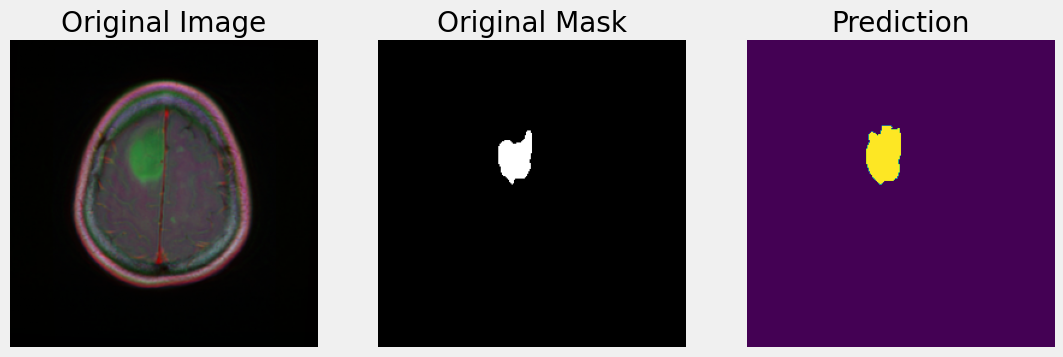

1/1 [==============================] - 0s 36ms/step


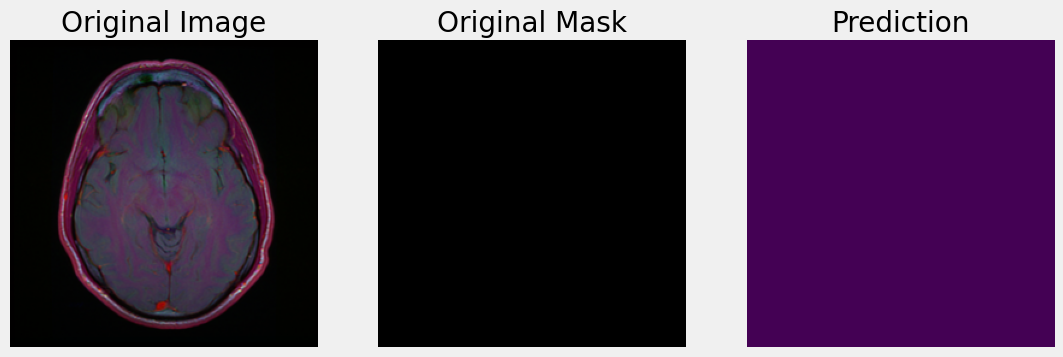

1/1 [==============================] - 0s 22ms/step


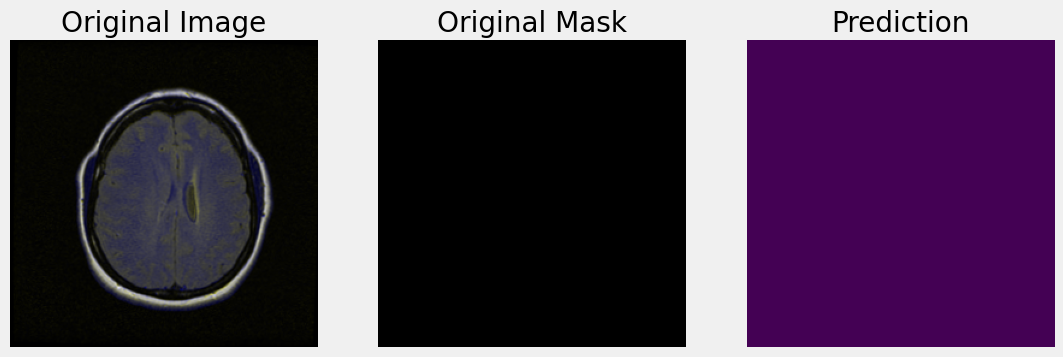

1/1 [==============================] - 0s 20ms/step


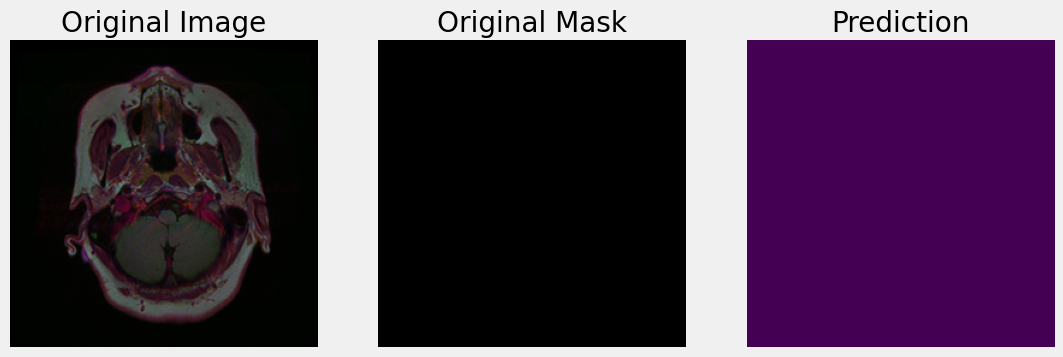

1/1 [==============================] - 0s 29ms/step


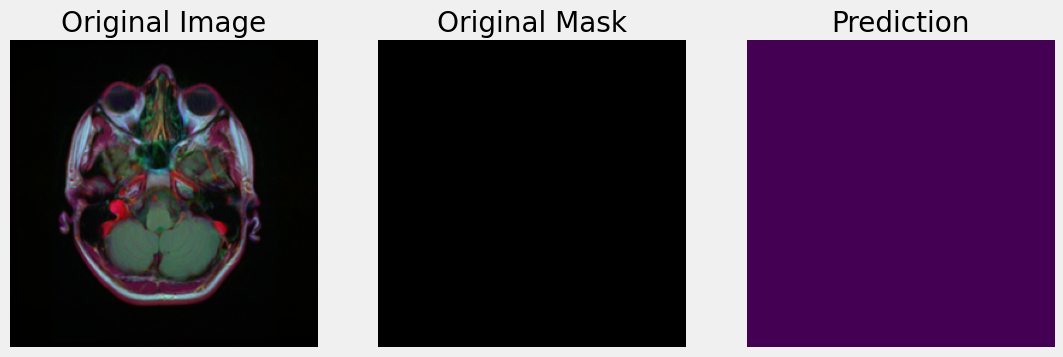

1/1 [==============================] - 0s 21ms/step


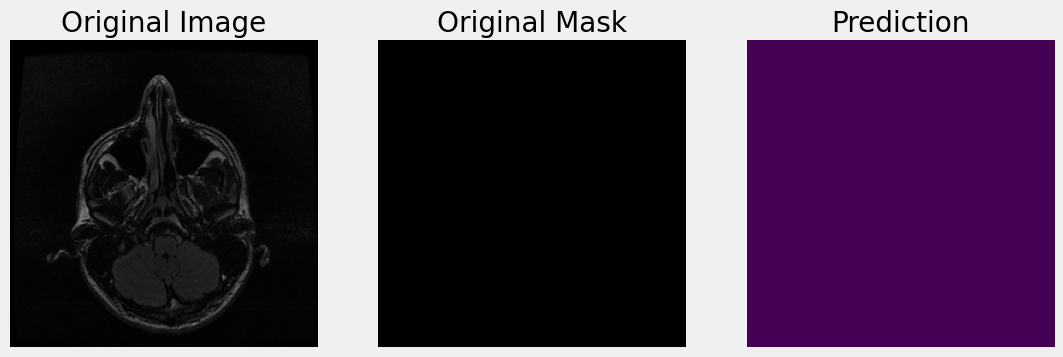

1/1 [==============================] - 0s 36ms/step


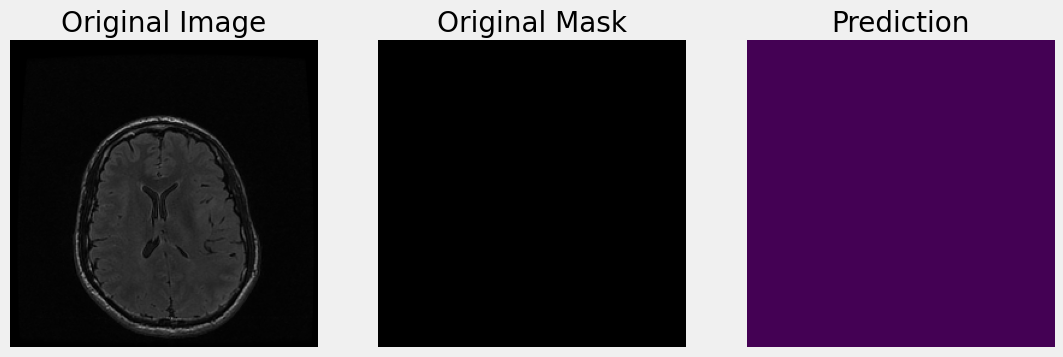

1/1 [==============================] - 0s 21ms/step


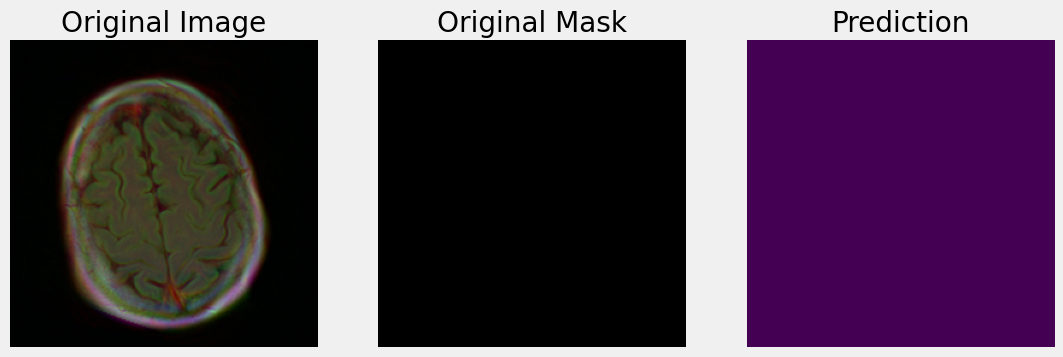

1/1 [==============================] - 0s 20ms/step


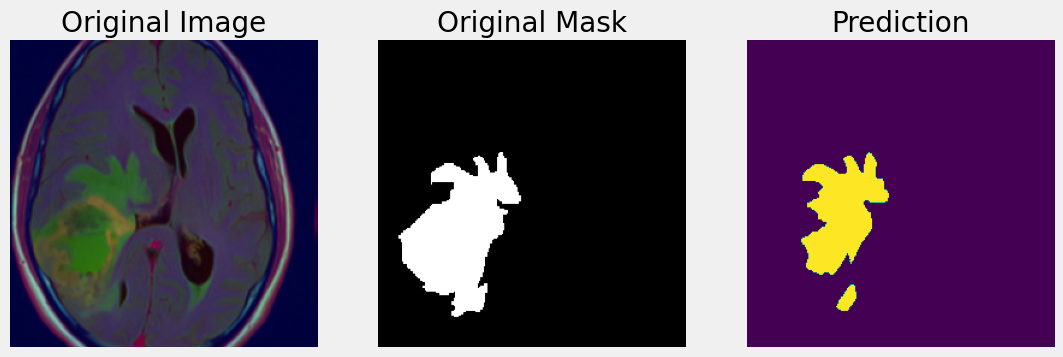

1/1 [==============================] - 0s 21ms/step


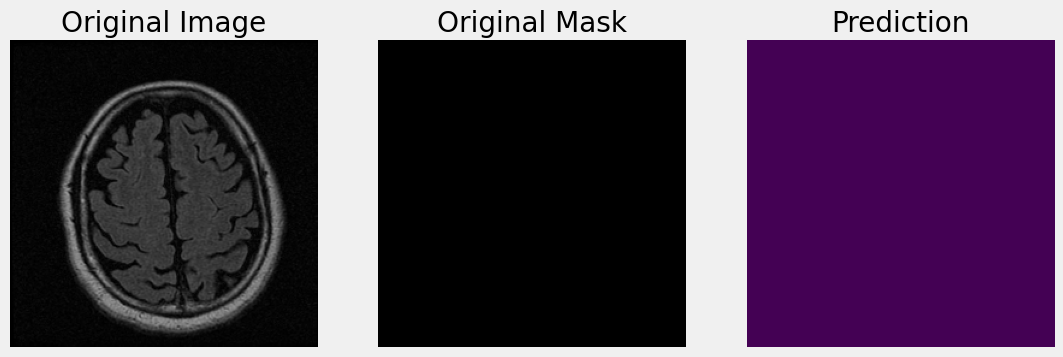

1/1 [==============================] - 0s 20ms/step


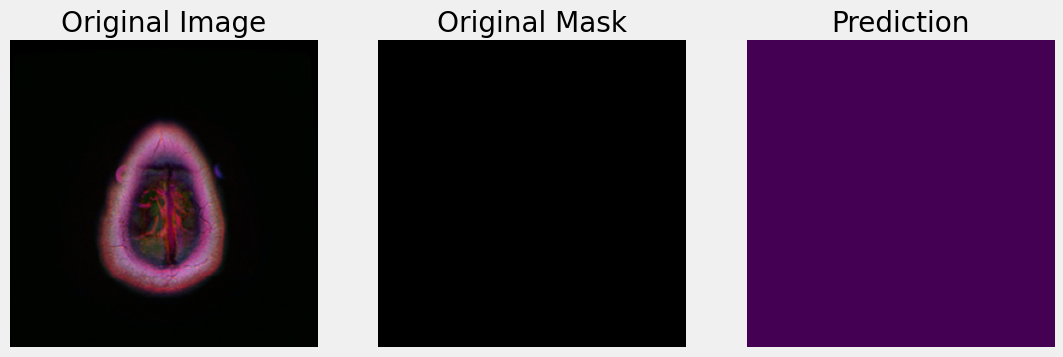

1/1 [==============================] - 0s 21ms/step


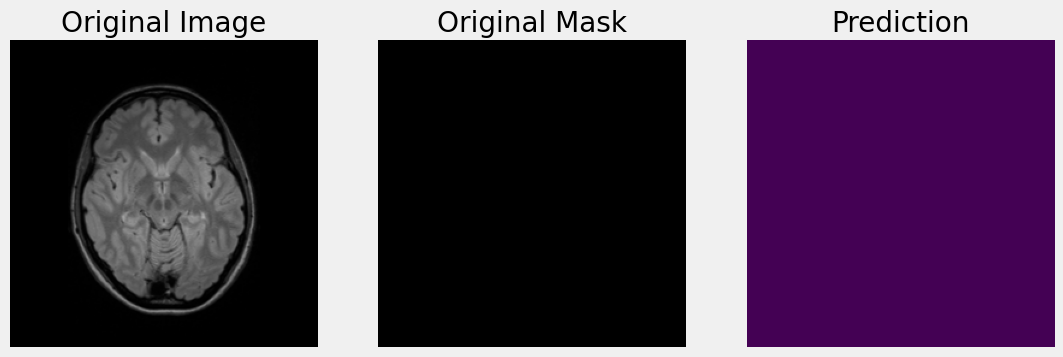

1/1 [==============================] - 0s 20ms/step


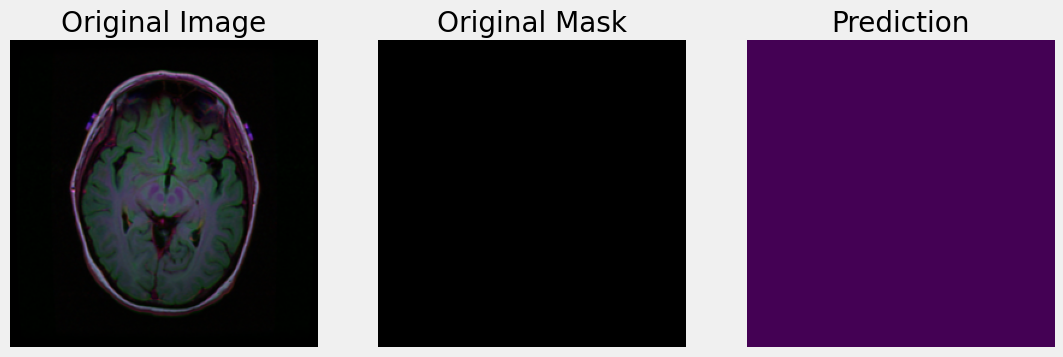

1/1 [==============================] - 0s 20ms/step


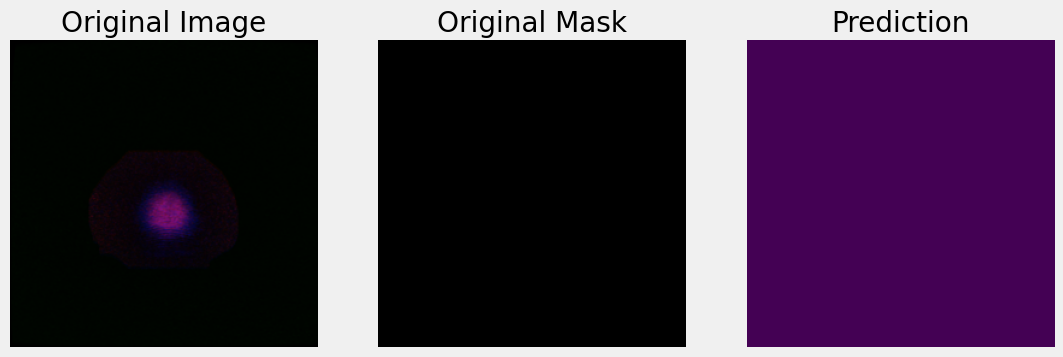

1/1 [==============================] - 0s 20ms/step


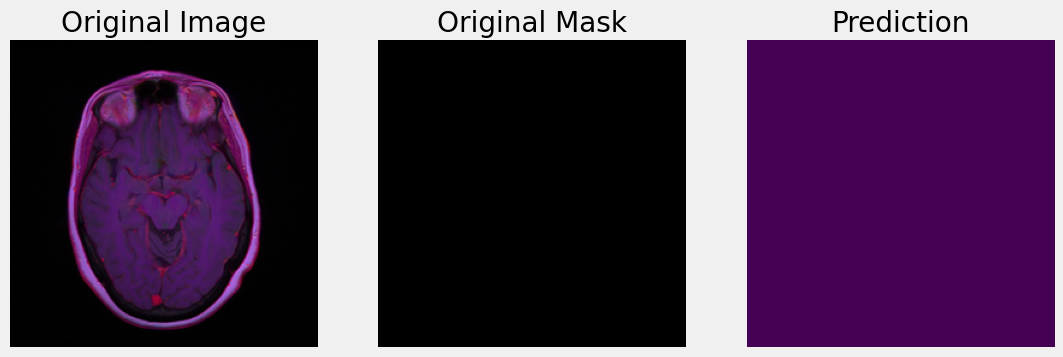

In [ ]:
# Prediction
for _ in range(20):
    index = np.random.randint(1, len(test_df.index))
    print(index)
    img = cv2.imread(test_df['images_paths'].iloc[index])
    img = cv2.resize(img, (256, 256))
    img = img/255
    img = img[np.newaxis, :, :, : ]

    predicted_img = model.predict(img)

    plt.figure(figsize=(12, 12))

    plt.subplot(1, 3, 1)
    plt.imshow(np.squeeze(img))
    plt.axis('off')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(np.squeeze(cv2.imread(test_df['masks_paths'].iloc[index])))
    plt.axis('off')
    plt.title('Original Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(np.squeeze(predicted_img) > 0.5 )
    plt.title('Prediction')
    plt.axis('off')
    plt.show()

# Clincal Use

from Yousef et al.

Brain tumor segmentation from MRIs has always been a challenging task for radiologists, therefore, an automatic and generalized system to address this task is needed. Among all other deep learning techniques used in medical imaging, U-Net-based variants are the most used models found in the literature to segment medical images with respect to different modalities.

from Samee et al.

Multiple stakeholders are involved in providing intelligent healthcare, including medical professionals, patients, hospitals, and academic research institutions. It is an organic totality that incorporates numerous dimensions, such as the prevention and monitoring of diseases, the diagnosis and treatment of illnesses, the management of hospitals, the making of decisions regarding health care, and the conducting of medical research. ... Clinical decision support systems, disease prevention and risk monitoring, and patient self-management are some examples of the services that may be provided by smart healthcare systems. Artificial intelligence (AI) has the ability to improve the quality and safety of clinical decision-making systems. Currently, AI is successfully integrated into decision support systems for diagnosis in data-intensive disciplines, such as pathology and radiology. These systems, which include computer-aided diagnosis systems for classifying lesions in a variety of diseases, are examples of the types of clinical applications that have recently benefited from the application of artificial intelligence.

# Further References

## LGG Segmentation Data Set

Mateusz Buda, AshirbaniSaha, Maciej A. Mazurowski "Association of genomic subtypes of lower-grade gliomas with shape features automatically extracted by a deep learning algorithm." Computers in Biology and Medicine, 2019.

and

Maciej A. Mazurowski, Kal Clark, Nicholas M. Czarnek, Parisa Shamsesfandabadi, Katherine B. Peters, Ashirbani Saha "Radiogenomics of lower-grade glioma: algorithmically-assessed tumor shape is associated with tumor genomic subtypes and patient outcomes in a multi-institutional study with The Cancer Genome Atlas data." Journal of Neuro-Oncology, 2017.

This dataset contains brain MR images together with manual FLAIR abnormality segmentation masks.
The images were obtained from The Cancer Imaging Archive (TCIA).
They correspond to 110 patients included in The Cancer Genome Atlas (TCGA) lower-grade glioma collection with at least fluid-attenuated inversion recovery (FLAIR) sequence and genomic cluster data available.

## U-Net Architecture: Convolutional Networks for Biomedical Image Segmentation

https://arxiv.org/abs/1505.04597

Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "U-net: Convolutional networks for biomedical image segmentation." Medical image computing and computer-assisted intervention–MICCAI 2015: 18th international conference, Munich, Germany, October 5-9, 2015, proceedings, part III 18. Springer International Publishing, 2015.

## Clinical Decision Support using Brain Tumor MRI U-Net Segmentation

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9777942/

Samee NA, Ahmad T, Mahmoud NF, Atteia G, Abdallah HA, Rizwan A. Clinical Decision Support Framework for Segmentation and Classification of Brain Tumor MRIs Using a U-Net and DCNN Cascaded Learning Algorithm. Healthcare (Basel). 2022 Nov 22;10(12):2340. doi: 10.3390/healthcare10122340. PMID: 36553864; PMCID: PMC9777942.

## U-Net-Based Models towards Optimal MR Brain Image Segmentation

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10178263/

Yousef R, Khan S, Gupta G, Siddiqui T, Albahlal BM, Alajlan SA, Haq MA. U-Net-Based Models towards Optimal MR Brain Image Segmentation. Diagnostics (Basel). 2023 May 4;13(9):1624. doi: 10.3390/diagnostics13091624. PMID: 37175015; PMCID: PMC10178263.